In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/pawankumarkc/Documents/vscode_workspace/MLAlgo/datasets/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,0.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.shape

(400, 26)

In [6]:
df.isnull().sum()/len(df)*100

#Cannot drop any parameter as this is a clinical dataset

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [8]:
#Imputing missing values
from sklearn.impute import SimpleImputer

imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_imputed = pd.DataFrame(imp_mode.fit_transform(df))
df_imputed.columns = df.columns
df_imputed

#Treat numerical value first and then try above one. (most_frequent - applicable for both numbers and char value)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,0.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [10]:
df_imputed.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [12]:
#Find the unique value in columns

for i in df_imputed.columns:
    print('***************',i,'***************')
    print(set(df_imputed[i].tolist()))
    print()

*************** id ***************
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214,

In [13]:
# Removing special characters from dataset 

df_imputed['classification'] = df_imputed['classification'].apply(lambda x:'ckd' if x=='ckd\t' else x)

In [20]:
df_imputed['wc'].value_counts()

9800     116
6700      10
9600       9
7200       9
9200       9
        ... 
19100      1
\t?        1
12300      1
14900      1
12700      1
Name: wc, Length: 92, dtype: int64

In [22]:
df_imputed['cad'] = df_imputed['cad'].apply(lambda x:'no' if x=='\tno' else x)
df_imputed['dm'] = df_imputed['dm'].apply(lambda x:'no' if x=='\tno' else x)
df_imputed['dm'] = df_imputed['dm'].apply(lambda x:'yes' if x=='\tyes' else x)

df_imputed['rc'] = df_imputed['rc'].apply(lambda x:'5.2' if x=='\t?' else x)

df_imputed['wc'] = df_imputed['wc'].apply(lambda x:'9800' if x=='\t?' else x)
df_imputed['wc'] = df_imputed['wc'].apply(lambda x:'8400' if x=='\t8400?' else x)
df_imputed['wc'] = df_imputed['wc'].apply(lambda x:'6200' if x=='\t6200' else x)

df_imputed['pcv'] = df_imputed['pcv'].apply(lambda x:'43' if x=='\43?' else x)
df_imputed['pcv'] = df_imputed['pcv'].apply(lambda x:'41' if x=='\t?' else x)


In [23]:
df_imputed['dm'] = df_imputed['dm'].apply(lambda x:'yes' if x==' yes' else x)


Axes(0.125,0.11;0.775x0.77)


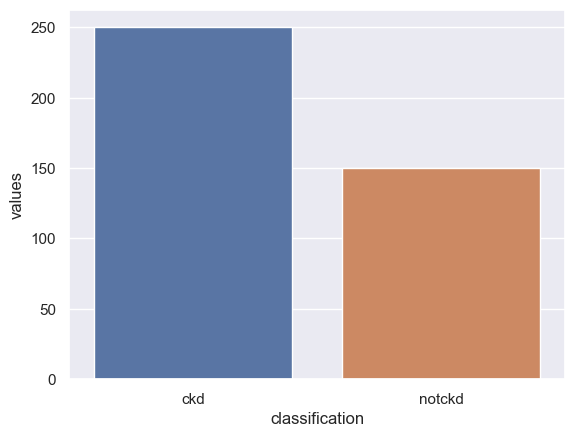

In [19]:
#check label imbalance
temp = df_imputed['classification'].value_counts()
temp_df = pd.DataFrame({'classification': temp.index, 'values': temp.values})
print(sns.barplot(data=temp_df, x='classification', y='values'))

In [16]:
#Converting back to non char to its original source as it was in df
for i in df.select_dtypes(exclude=['object']).columns:
    df_imputed[i] = df_imputed[i].apply(lambda x: float(x))

df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    float64
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    object 
 17  wc              400 non-null    obj

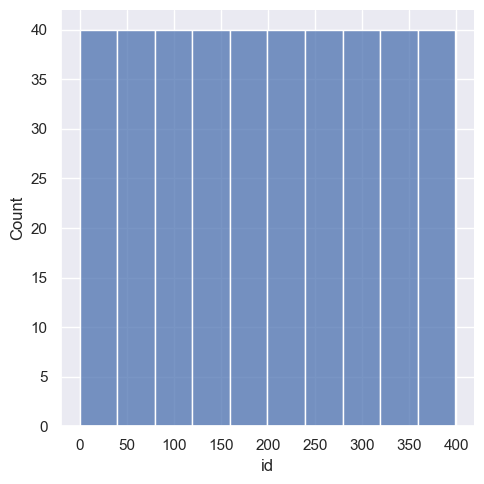

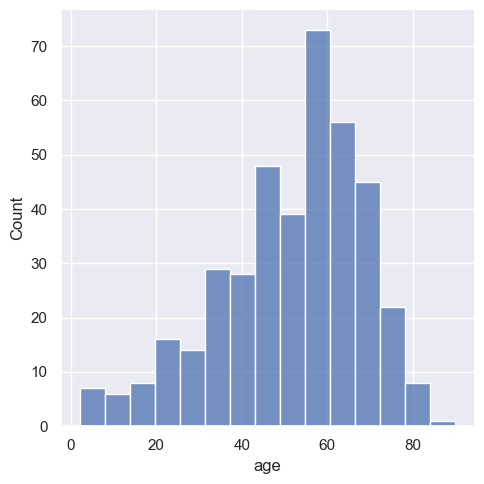

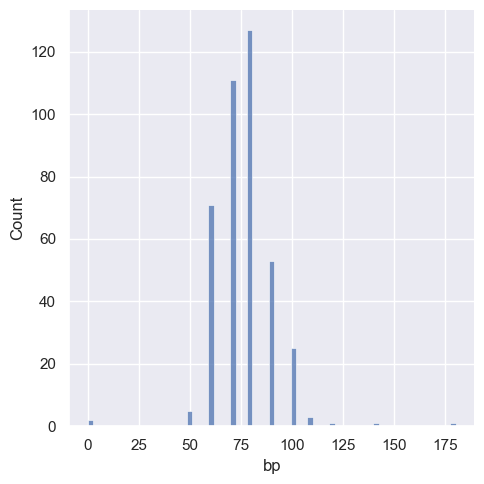

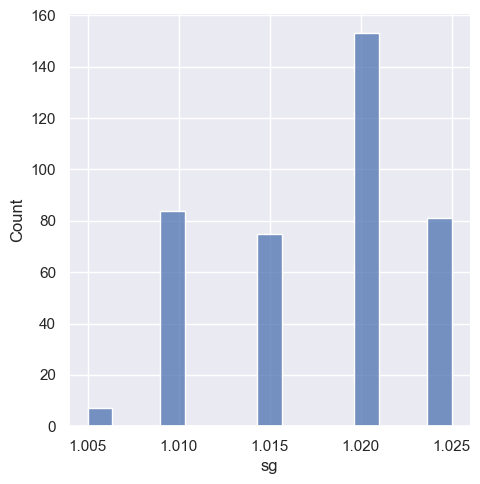

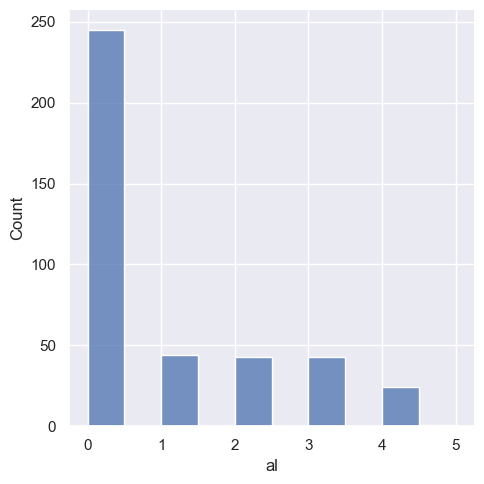

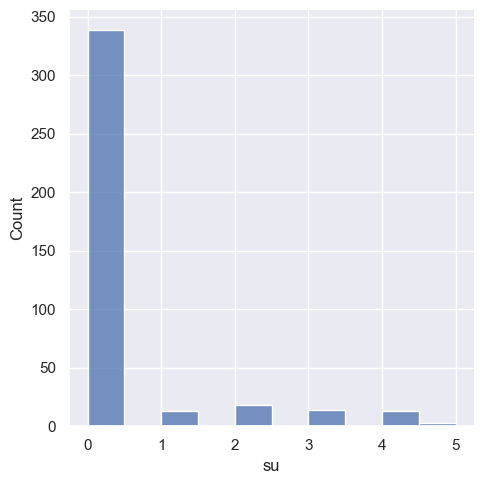

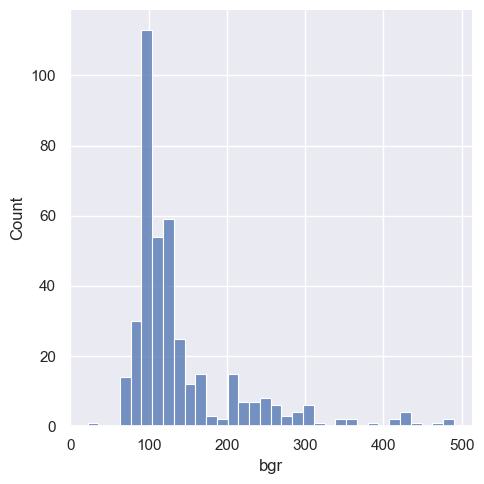

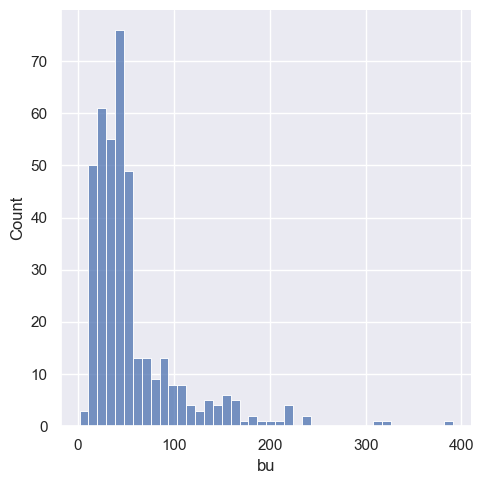

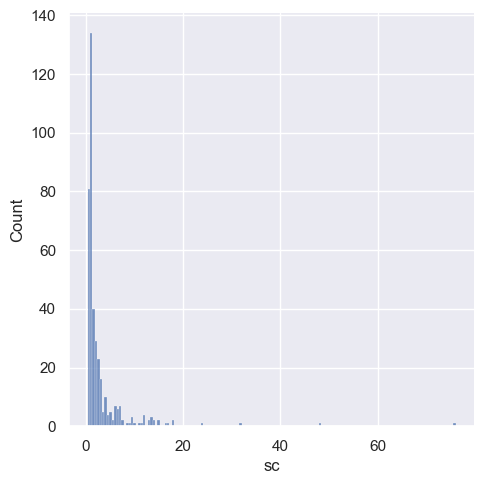

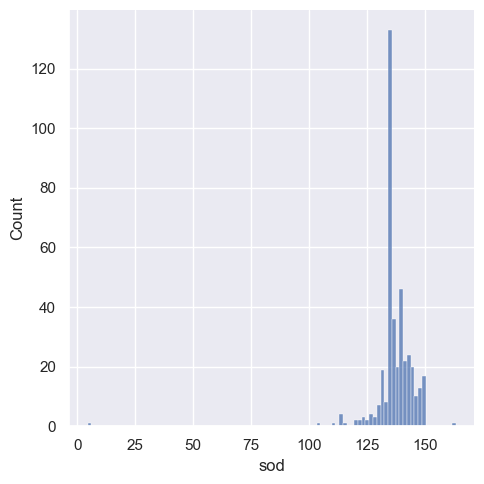

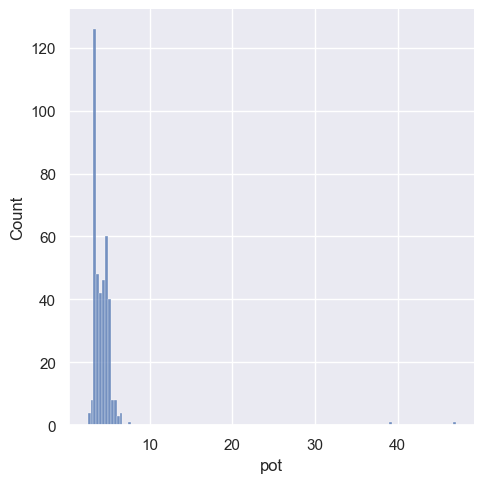

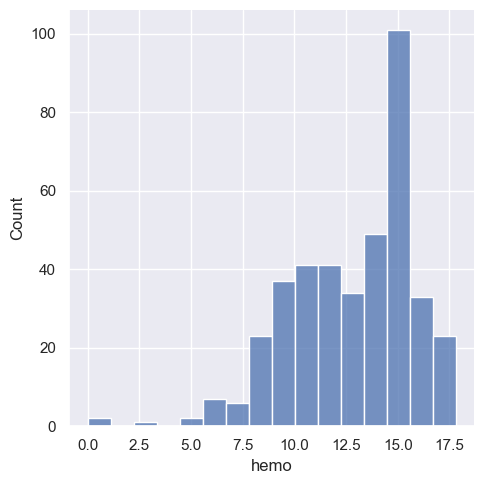

In [24]:
# Find the distribution of dataset
#TODO chec sir 
def distplot(col):
    sns.displot(df_imputed[col])
    plt.show()

for i in list(df_imputed.select_dtypes(exclude=[object])):
    distplot(i)

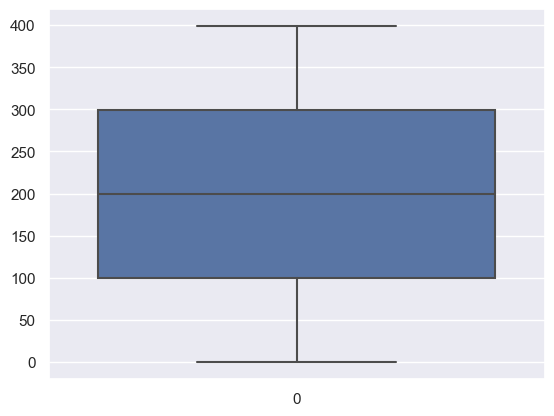

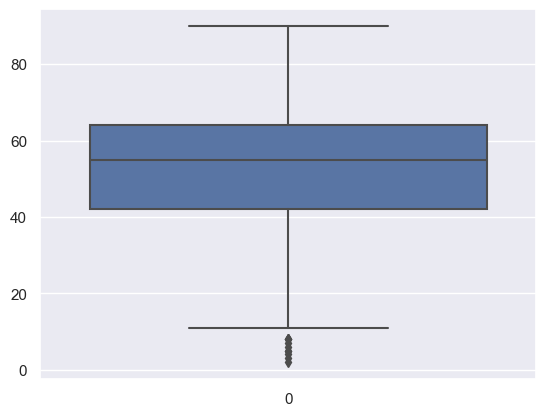

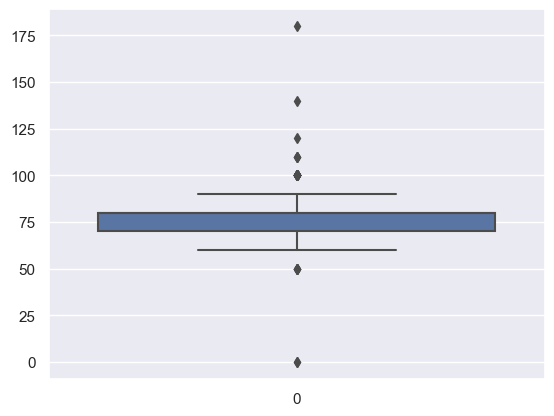

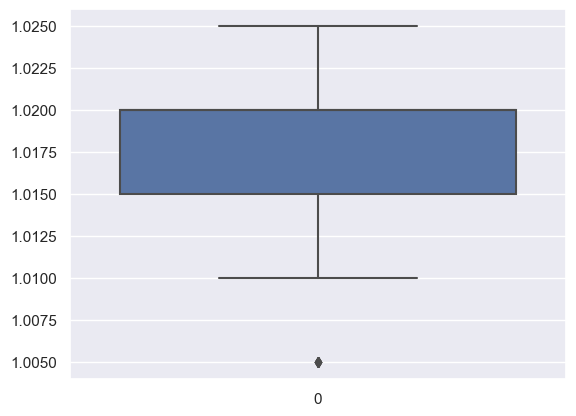

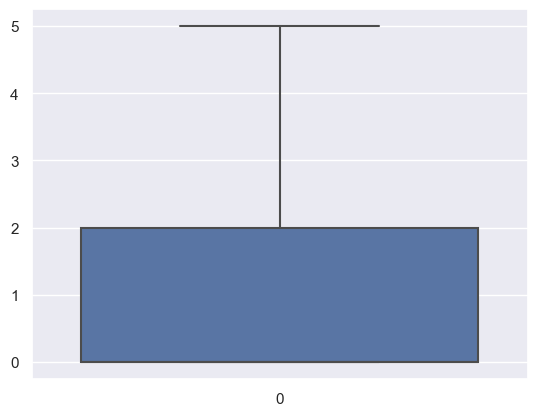

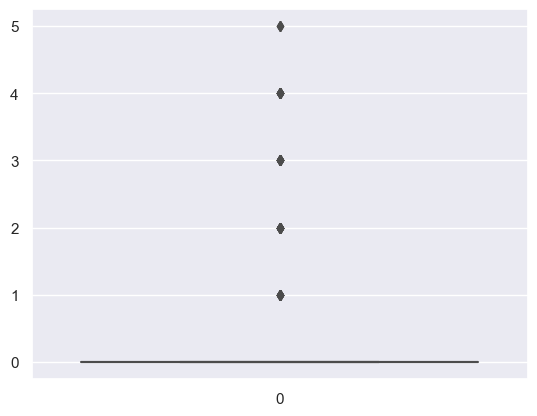

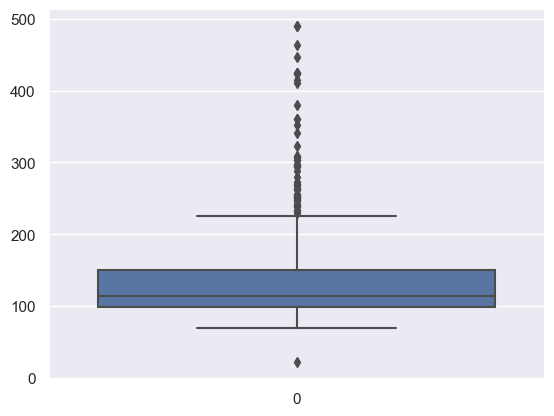

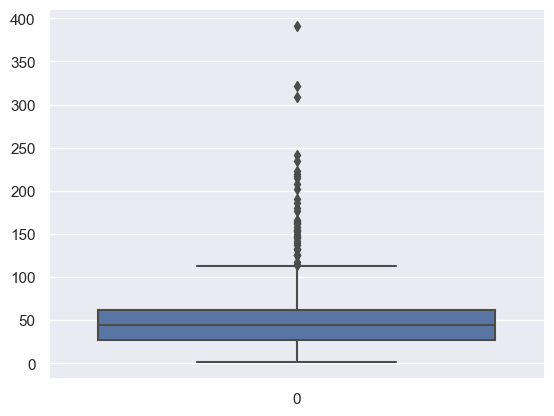

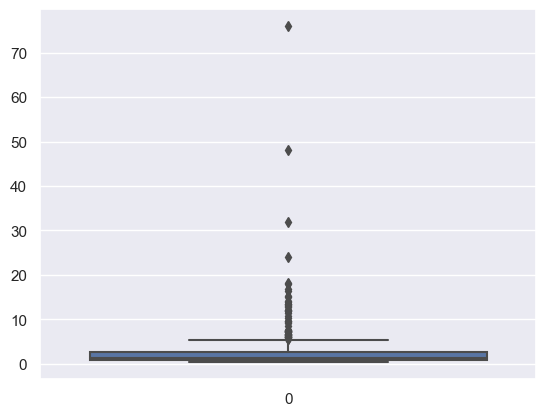

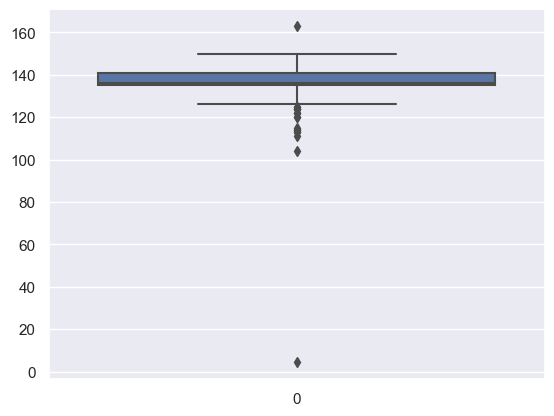

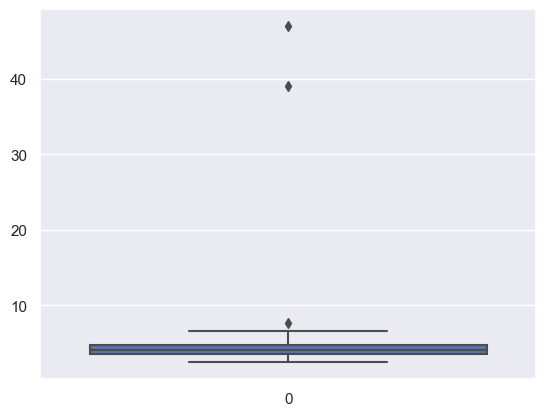

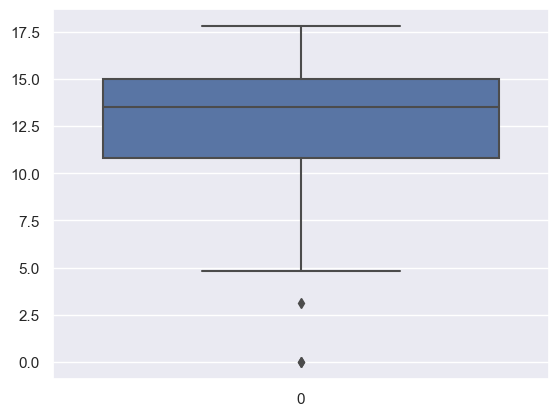

In [25]:
# Find the outlier
def boxplots(col):
    sns.boxplot(df_imputed[col])
    plt.show()

for i in list(df_imputed.select_dtypes(exclude=[object])):
    boxplots(i)

# Since this is a clinical dataset, we will not handle outliers

In [27]:
# Label encoding to convert categorical values to numerical

from sklearn import preprocessing

df_enco = df_imputed.apply(preprocessing.LabelEncoder().fit_transform)
df_enco

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,40,4,3,1,0,1,1,0,0,...,31,70,30,1,1,0,0,0,0,0
1,1,5,1,3,4,0,1,1,0,0,...,25,54,30,0,0,0,0,0,0,0
2,2,54,4,1,2,3,1,1,0,0,...,18,68,30,0,1,0,1,0,1,0
3,3,40,3,0,4,0,1,0,1,0,...,19,60,17,1,0,0,1,1,1,0
4,4,43,0,1,2,0,1,1,0,0,...,22,66,24,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,47,4,3,0,0,1,1,0,0,...,34,60,27,0,0,0,0,0,0,1
396,396,34,3,4,0,0,1,1,0,0,...,41,70,40,0,0,0,0,0,0,1
397,397,8,4,3,0,0,1,1,0,0,...,36,59,32,0,0,0,0,0,0,1
398,398,11,2,4,0,0,1,1,0,0,...,38,65,37,0,0,0,0,0,0,1


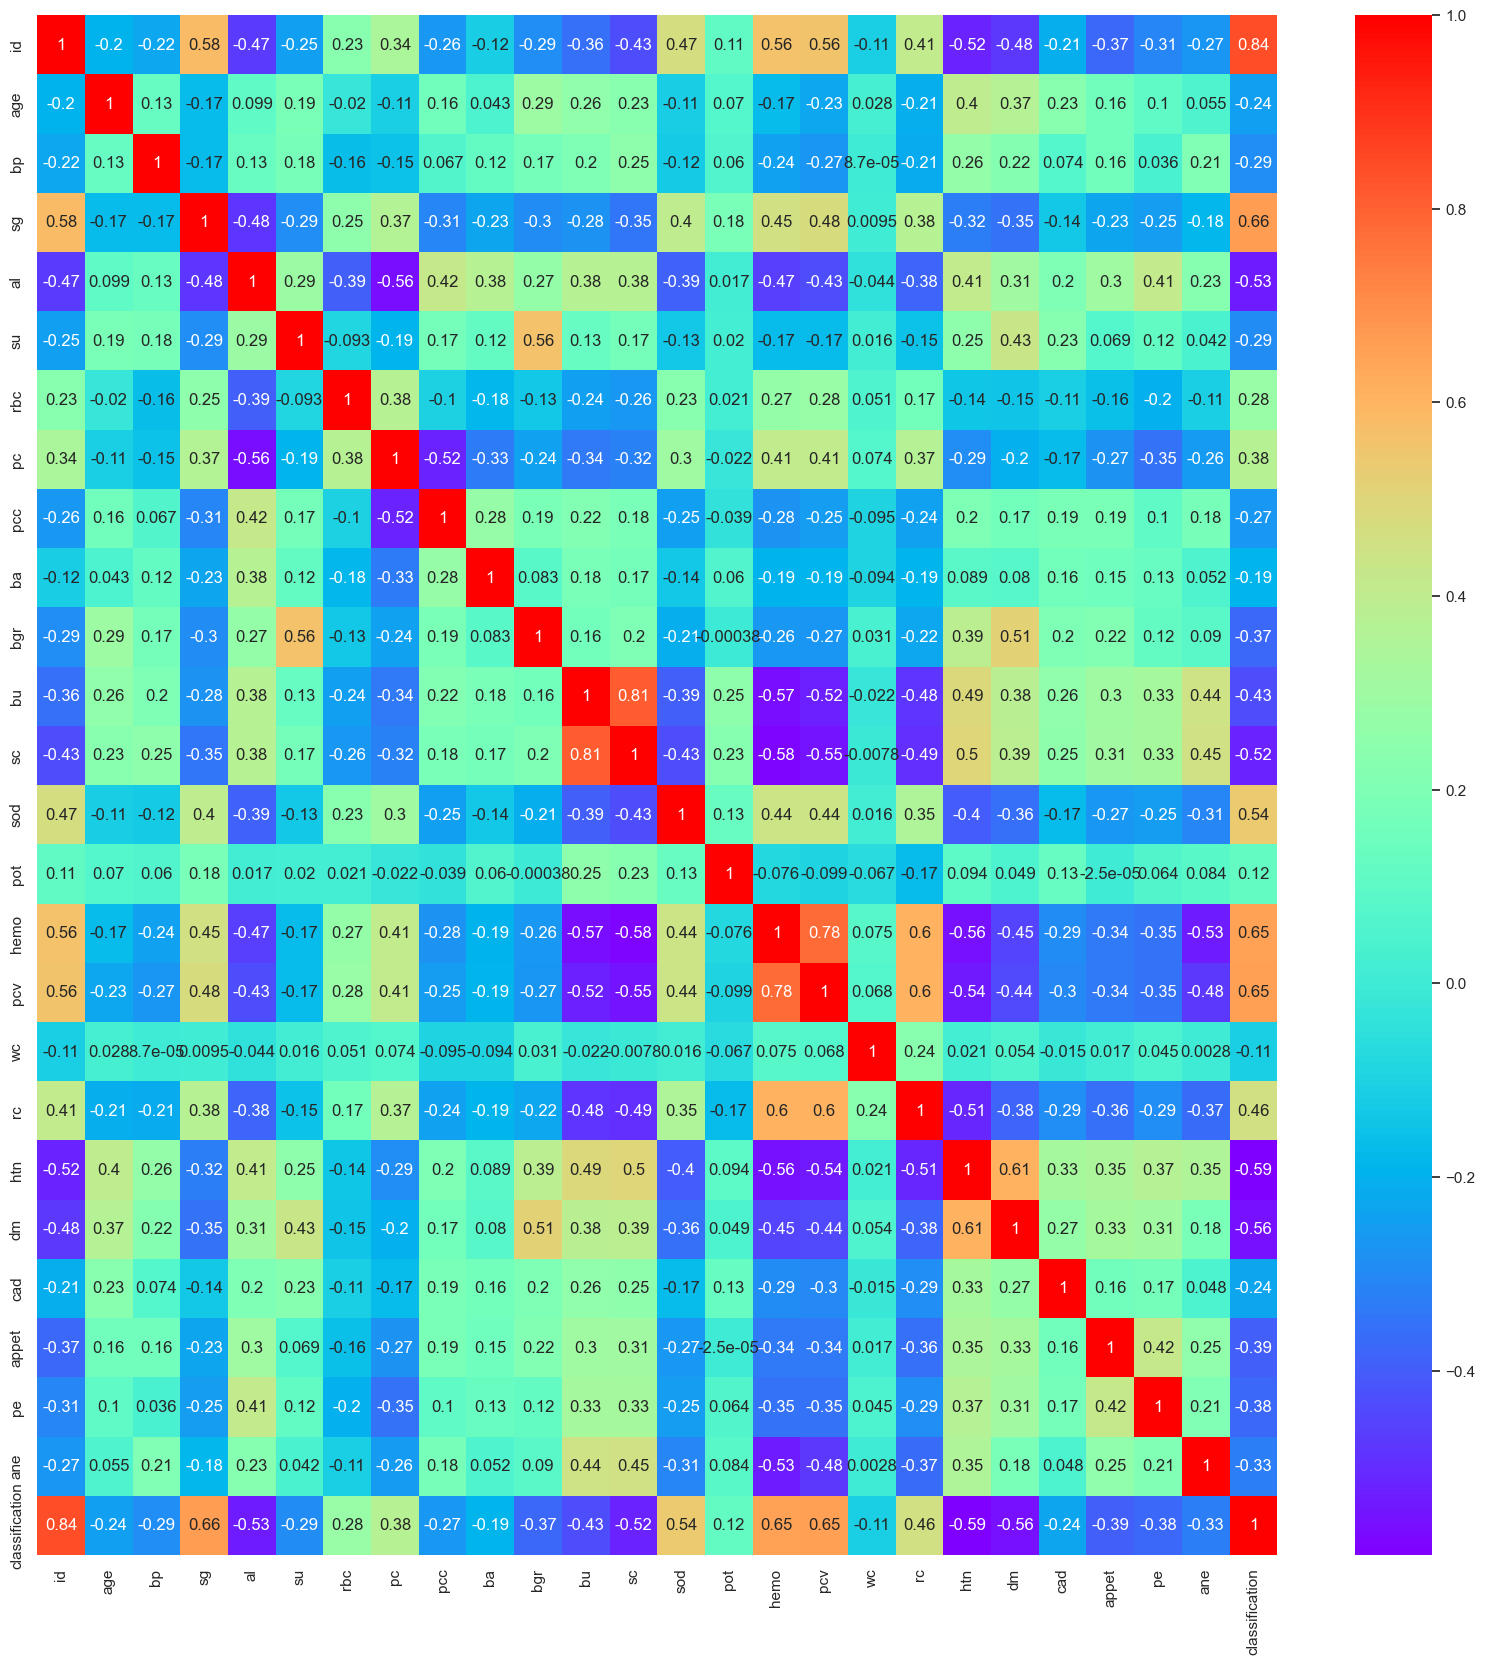

In [32]:
#Finding correlation

plt.figure(figsize=(20,20))
corr = df_enco.corr()
sns.heatmap(corr, annot=True, cmap='rainbow')
plt.show()

In [31]:
df_enco.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
#split dep and independent variables

x = df_enco.drop(columns=['id'])
y = df_enco['classification']

In [ ]:
y.value_count()

In [ ]:
#Even though x and y is balanced, rebalance once again as if sample data  